In [1]:
#Gọi các thư viện sử dụng
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def faceDetection(test_img):
   
    gray_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY); 
   
    faceDetect = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'); 
    
    #phát hiện các khuôn mặt trong ảnh với phương thức detecMultiScale
    faces = faceDetect.detectMultiScale(gray_img, scaleFactor=1.32, minNeighbors=5) 
    
    return faces,gray_img

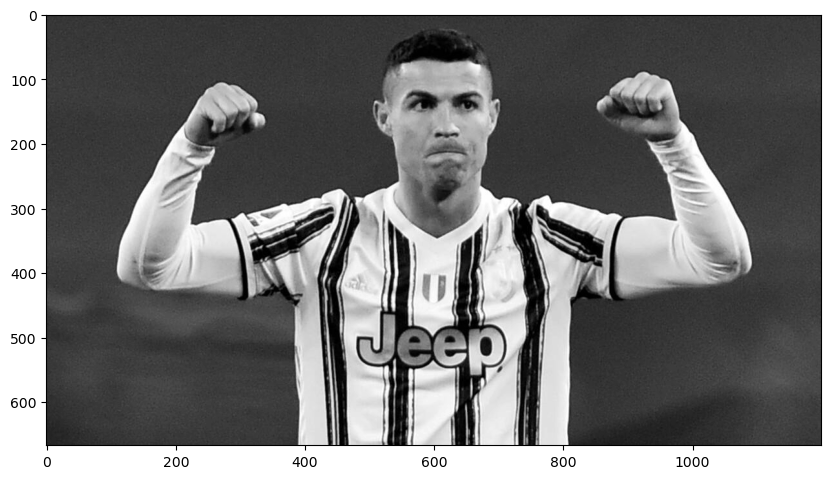

Số khuôn mặt phát hiện trong ảnh: 1
Vị trí khuôn mặt: 
 [[513  59 206 206]]


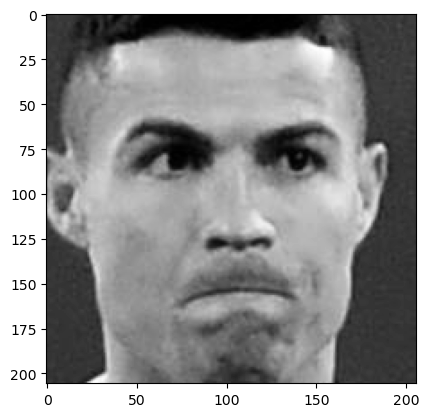

In [3]:
#Kiểm tra hàm phát hiện và tách khuôn mặt trong ảnh
test1=cv2.imread('TestImages/ronaldo.jpg')
f, g = faceDetection(test1)

plt.figure(figsize=(10,6))
plt.imshow(g, cmap="gray")
plt.show()
print('Số khuôn mặt phát hiện trong ảnh:',len(f))
print('Vị trí khuôn mặt: \n',f)
for i in range(0,len(f)):
    (x,y,w,h)=f[i]
    roi_gray=g[y:y+w,x:x+h]
    plt.imshow(roi_gray,cmap="gray")
    plt.show()

## Bước 1: Xác định bài toán, thu thập các dữ liệu liên quan
---
Xây dựng bộ nhận diện khuôn mặt cho 4 đối tượng và thực hiện thu thập, tiền xử lý ảnh của các đối tượng này:
* Folder 0: Messi  - 30 ảnh
* Folder 1: Công Phượng  - 30 ảnh
* Folder 2: Ronaldo - 30 ảnh

Dữ liệu thu thập bao gồm 135 ảnh và lưu trữ trong thư mục TrainingImages

## Bước 2: Tách khuôn mặt trong ảnh và gán nhãn dữ liệu
---
Sử dụng thư viện OpenCV, lần lượt tách vị trí khuôn mặt trong ảnh và gán nhãn dữ liệu tương ứng với từng khuôn mặt.
Kết quả của bước này sẽ thu được một mảng chỉ gồm các khuôn mặt và nhãn (0, 1, 2) tương ứng với mỗi khuôn mặt.

In [4]:
#　Hàm đọc ảnh trong các thư mục, kết quả trả về đối tượng và nhãn tương ứng
def labels_for_training_data(directory):
    faces=[]
    lalels=[]

    for path,subdirnames,filenames in os.walk(directory):
        for filename in filenames:
            if filename.startswith("."):
                print("Lưu lại file hệ thống") #Giữ lại file hệ thống bắt đầu bời dấu .
                continue

            id=os.path.basename(path)
            img_path=os.path.join(path,filename)
            print("img_path:",img_path)
            print("id:",id)
            test_img=cv2.imread(img_path)
            if test_img is None:
                print("Không đọc được ảnh")
                continue
            #Gọi hàm nhận dạng khuôn mặt và trả về ảnh nhận dạng và nhãn tương ứng
            faces_rect,gray_img=faceDetection(test_img)
            if len(faces_rect)==0:
                print('Không thấy khuôn mặt trong ảnh!')
                continue
                
            (x,y,w,h)=faces_rect[0]
            roi_gray=gray_img[y:y+w,x:x+h] 
            faces.append(roi_gray)
            lalels.append(int(id))
            
    return faces,lalels


In [5]:
#Thực hiện việc đọc lần lượt các ảnh trong thư mục trainingImages
# và gán nhãn cho các khuôn mặt phát hiện được
faces,labels = labels_for_training_data('trainingImages')

img_path: trainingImages\0\pic_1.jpg
id: 0
img_path: trainingImages\0\pic_10.jpg
id: 0
img_path: trainingImages\0\pic_11.jpg
id: 0
img_path: trainingImages\0\pic_12.jpg
id: 0
img_path: trainingImages\0\pic_13.jpg
id: 0
img_path: trainingImages\0\pic_14.jpg
id: 0
img_path: trainingImages\0\pic_15.jpg
id: 0
img_path: trainingImages\0\pic_16.jpg
id: 0
img_path: trainingImages\0\pic_17.jpg
id: 0
img_path: trainingImages\0\pic_18.jpg
id: 0
img_path: trainingImages\0\pic_19.jpg
id: 0
img_path: trainingImages\0\pic_2.jpg
id: 0
img_path: trainingImages\0\pic_20.jpg
id: 0
img_path: trainingImages\0\pic_21.jpg
id: 0
img_path: trainingImages\0\pic_22.jpg
id: 0
img_path: trainingImages\0\pic_23.jpg
id: 0
img_path: trainingImages\0\pic_24.jpg
id: 0
img_path: trainingImages\0\pic_25.jpg
id: 0
img_path: trainingImages\0\pic_26.jpg
id: 0
img_path: trainingImages\0\pic_27.jpg
id: 0
img_path: trainingImages\0\pic_28.jpg
id: 0
img_path: trainingImages\0\pic_29.jpg
id: 0
img_path: trainingImages\0\pic_3.j

In [6]:
#Tổng số khuôn mặt tách và gán nhãn trong dữ liệu huấn luyện
print("Total faces: ", len(faces))
print("Total labels: ", len(labels))

Total faces:  68
Total labels:  68


2  -  Ronaldo


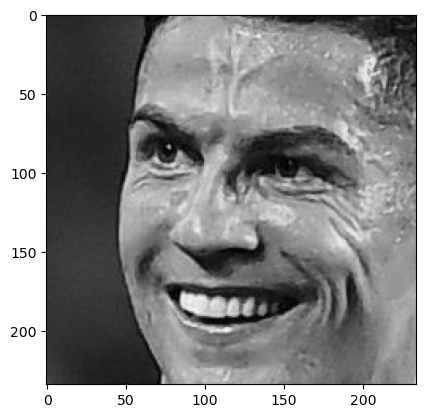

In [7]:
#Quan sát ảnh đã tách và nhãn tương ứng
names = {0:"Messi",1:"Cong Phuong",2:"Ronaldo"}

#Ví dụ: Hiển thị khuôn mặt và nhãn tương ứng 
i=67

print(labels[i], ' - ', names[labels[i]])
plt.imshow(cv2.cvtColor(faces[i],cv2.COLOR_BGR2RGB))
plt.show()

## Bước 3: Thực hiện huấn luyện và lưu model nhận diện khuôn mặt
---
Sử dụng thuật toán nhận diện khuôn mặt có trong thư viện OpenCV là LBPHFaceRecognizer để huấn luyện model

In [8]:
np.array(labels)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2])

In [9]:
#1.Khởi tạo model 
face_recognizer = cv2.face.LBPHFaceRecognizer_create()

#2. Huấn luyện model
face_recognizer.train(faces, np.array(labels))

face_recognizer

< cv2.face.LBPHFaceRecognizer 0000014CA07B3A50>

In [10]:
#3.Lưu model đã huấn luyện
face_recognizer.save("model_detect_faces.yml")

## Bước 4: Sử dụng model huấn luyện, test thử dữ liệu
---
Mở model đã huấn luyện, thực hiện dùng model nhận diện khuôn mặt với 1 ảnh đưa vào

Ảnh test chứa trong thư mục TestImages:

In [11]:
#1. Đọc model đã lưu để sử dụng
model_face_recognizer=cv2.face.LBPHFaceRecognizer_create()
model_face_recognizer.read('model_detect_faces.yml')

Số khuôn mặt nhận dạng được: 1
Vị trí Khuôn mặt được nhận dạng: 
 [[513  59 206 206]]


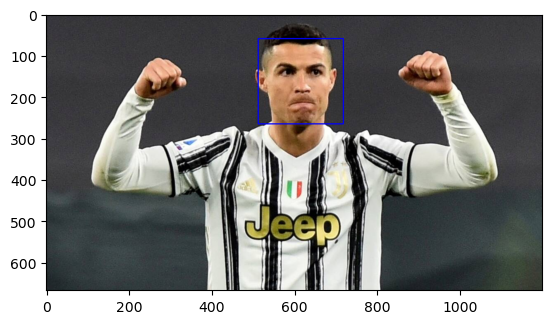

In [12]:
#Đưa ảnh test để check
test_img=cv2.imread('TestImages/ronaldo.jpg')#test_img path

#Lấy từng khuôn mặt có trong ảnh Test:
faces_detected,gray_img=faceDetection(test_img)

print('Số khuôn mặt nhận dạng được:',len(faces_detected))
print("Vị trí Khuôn mặt được nhận dạng: \n",faces_detected)


# Lặp qua các khuôn mặt nhận được để hiện thông tin
for(x,y,w,h) in faces_detected:
    # Vẽ hình chữ nhật quanh mặt
    cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=2) #thickness=5

#Hiển thị kết quả tách khuôn mặt trong ảnh:
plt.imshow(cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB))
plt.show()

label: 2 - Ronaldo


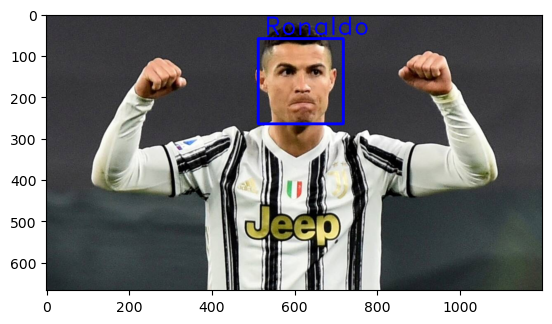

In [14]:
#Xác định danh tính:
#Đưa từng khuôn mặt đã phát hiện được vào model đã huấn luyện để xác định nhãn tương ứng với khuôn mặt.

for face in faces_detected:
    #Lần lượt các khuôn mặt phát hiện được trong ảnh
    (x,y,w,h)=face
    roi_gray=gray_img[y:y+h,x:x+h]
    
    #Đưa khuôn mặt vào model để dự đoán nhãn
    label,confidence=model_face_recognizer.predict(roi_gray)#predicting the label of given image
    predicted_name=names[label] 
    
    print("label:",label, '-',predicted_name)
    
    #Gắn khung chữ nhật bao quanh khuôn mặt phát hiện
    cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=5)
    

    if(confidence>80):#Ngưỡng để quyết định xem có in tên lên khuôn mặt nhận được hay không
        cv2.putText(test_img,
                'No name',
                (x+15,y-10),
                cv2.FONT_HERSHEY_DUPLEX,2,(0,0,255),2)
        continue

    #Gắn nhãn của khuôn mặt mà model xác định được vào ảnh test
    cv2.putText(test_img,
                predicted_name,
                (x+15,y-10),
                cv2.FONT_HERSHEY_DUPLEX,2,(255,0,0),2)


#Hiển thị kết quả nhận diện khuôn mặt
plt.imshow(cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB))
plt.show()